In [20]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="1"
import tensorflow as tf
from keras.utils import image_dataset_from_directory


train_dir = "data/cats_dogs/train"
test_dir = "data/cats_dogs/test"

train_generator, validation_generator = image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="both",
  seed=42,
  image_size=(150, 150),
  batch_size=20
  )

test_generator = image_dataset_from_directory(
  test_dir,
  image_size=(150, 150),
  batch_size=20
  )

Found 20000 files belonging to 2 classes.
Using 16000 files for training.
Using 4000 files for validation.
Found 5000 files belonging to 2 classes.


In [15]:
from keras import optimizers
from keras import models, layers


model = models.Sequential()

# model.add(layers.RandomBrightness(factor=[-0.2, 0.2]))
# model.add(layers.RandomContrast(factor=0.2))
# model.add(layers.RandomFlip())
# model.add(layers.RandomRotation(factor=[-0.2, 0.2]))
# model.add(layers.RandomTranslation(height_factor=0.2, width_factor=0.2))
# model.add(layers.RandomZoom(height_factor=[-0.2, 0.2]))

model.add(layers.Rescaling(scale=1./255))

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [16]:
history = model.fit(
      x=train_generator,
      epochs=30,
      steps_per_epoch=800,
      validation_data=validation_generator,
      validation_steps=20,
      verbose=2
)

Epoch 1/30
800/800 - 36s - loss: 0.6791 - acc: 0.5645 - val_loss: 0.6356 - val_acc: 0.6725 - 36s/epoch - 45ms/step
Epoch 2/30
800/800 - 35s - loss: 0.6126 - acc: 0.6606 - val_loss: 0.5535 - val_acc: 0.7400 - 35s/epoch - 44ms/step
Epoch 3/30
800/800 - 36s - loss: 0.5475 - acc: 0.7188 - val_loss: 0.5492 - val_acc: 0.7300 - 36s/epoch - 45ms/step
Epoch 4/30
800/800 - 35s - loss: 0.5038 - acc: 0.7550 - val_loss: 0.4890 - val_acc: 0.7800 - 35s/epoch - 43ms/step
Epoch 5/30
800/800 - 35s - loss: 0.4608 - acc: 0.7846 - val_loss: 0.4272 - val_acc: 0.8050 - 35s/epoch - 44ms/step
Epoch 6/30
800/800 - 35s - loss: 0.4255 - acc: 0.8032 - val_loss: 0.4030 - val_acc: 0.8250 - 35s/epoch - 43ms/step
Epoch 7/30
800/800 - 35s - loss: 0.3941 - acc: 0.8238 - val_loss: 0.3841 - val_acc: 0.8450 - 35s/epoch - 44ms/step
Epoch 8/30
800/800 - 36s - loss: 0.3638 - acc: 0.8369 - val_loss: 0.3965 - val_acc: 0.8250 - 36s/epoch - 45ms/step
Epoch 9/30
800/800 - 36s - loss: 0.3395 - acc: 0.8524 - val_loss: 0.3501 - val_a

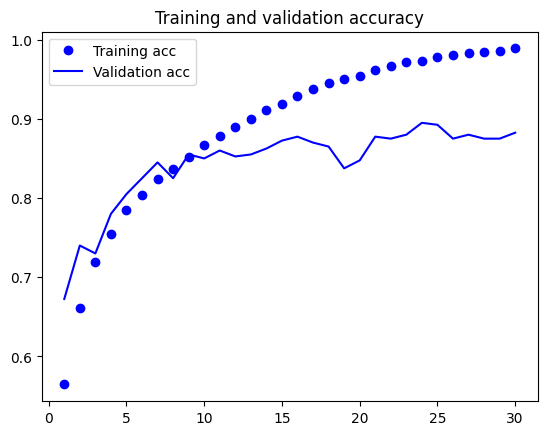

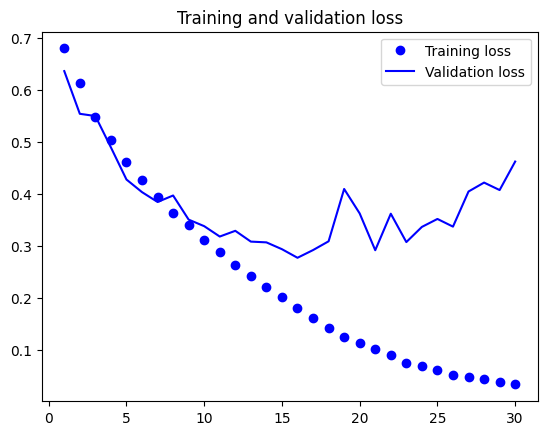

In [18]:
import matplotlib.pyplot as plt


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
model.evaluate(test_generator)

250/250 [==============================] - 4s 14ms/step - loss: 0.4418 - acc: 0.8846


[0.4418277442455292, 0.8845999836921692]